<a href="https://colab.research.google.com/github/raspberryscorn/2_6_2/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2_6_2 AI는 체격만 보고 체중을 추론할 수 있을까

In [1]:
cd "/content/drive/MyDrive/ddeep/bhban_ai/SECTION_2/Chapter_6/2_6_2"

/content/drive/MyDrive/ddeep/bhban_ai/SECTION_2/Chapter_6/2_6_2




Data Read Done!
Training X Size : (134384, 7)
Training Y Size : (134384,)
Test X Size : (33596, 7)
Test Y Size : (33596,)




************ TRAINING START ************ 
Epoch 1/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0023 - mae: 0.0355 - val_loss: 0.0013 - val_mae: 0.0273
Epoch 2/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0014 - mae: 0.0277 - val_loss: 0.0014 - val_mae: 0.0279
Epoch 3/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0013 - mae: 0.0271 - val_loss: 0.0013 - val_mae: 0.0272
Epoch 4/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0013 - mae: 0.0272 - val_loss: 0.0012 - val_mae: 0.0255
Epoch 5/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0013 - mae: 0.0266 - val_loss: 0.0012 - val_mae: 0.0255
Epoch 6/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0013 - mae: 0.0269 - val_loss: 0.0012 - val_mae: 0.0255
Epoch 7/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0013 - mae: 0.0266 - val_loss: 0.0014 - v

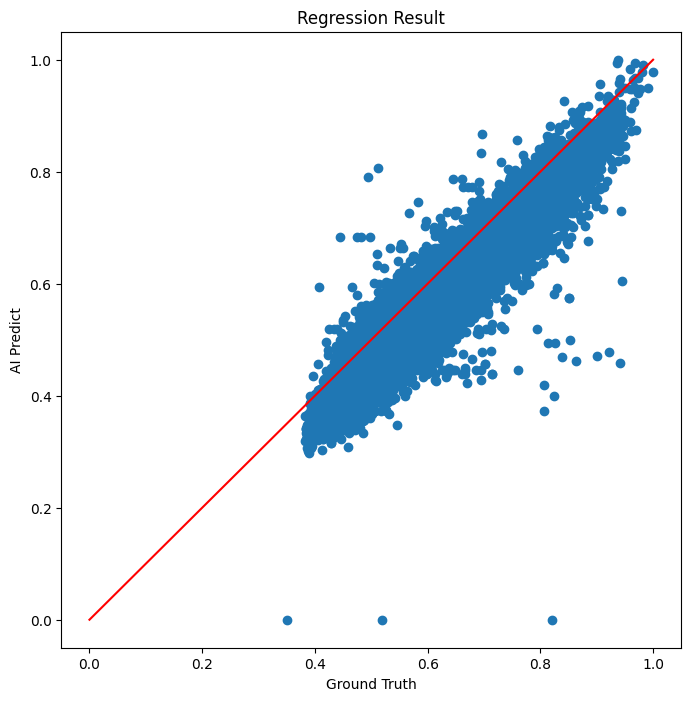

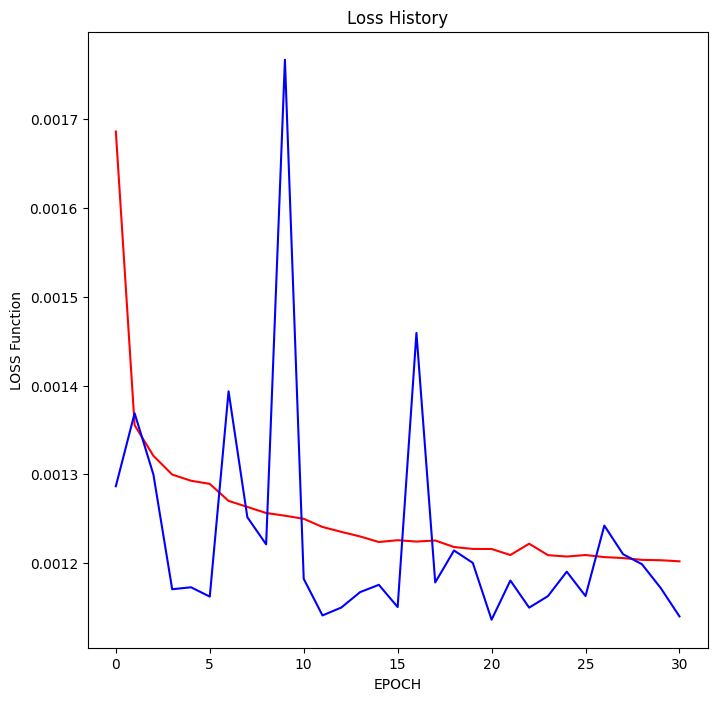

In [2]:
"""
Author : Byunghyun Ban
Date : 2020.07.24.
"""

import pandas as pd

from tensorflow import keras
import data_reader

# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 50  # 예제 기본값은 50입니다.

# 데이터를 읽어옵니다.
file_path = ""
dr = data_reader.DataReader()

# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Dense(7),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(1, activation='sigmoid')
])

# 인공신경망을 컴파일합니다.
model.compile(optimizer="adam", loss="mse", metrics=['mae'])

# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(model(dr.test_X), dr.test_Y, history)
